In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input to this file is your pre-engineered dataset
df = pd.read_csv('df2_Spotify_yash.csv')


cols = ['genre',
       'popularity_standardized', 'acousticness_standardized',
       'danceability_standardized', 'duration_ms_standardized',
       'instrumentalness_standardized', 'liveness_standardized',
       'loudness_standardized', 'speechiness_standardized',
       'valence_standardized', 'tempo_standardized', 'energy_standardized',
       'mode_major', 'mode_minor', 'key_A', 'key_A#', 'key_B', 'key_C',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'time_signature_0/4', 'time_signature_1/4',
       'time_signature_3/4', 'time_signature_4/4', 'time_signature_5/4']

target = 'genre'
df = df[cols]
df.loc[0]

genre                               Movie
popularity_standardized          -1.98664
acousticness_standardized        0.380761
danceability_standardized       -0.631232
duration_ms_standardized        -0.925616
instrumentalness_standardized   -0.622349
liveness_standardized            0.433307
loudness_standardized            1.333116
speechiness_standardized        -0.381456
valence_standardized             1.306593
tempo_standardized               1.580643
energy_standardized              1.267122
mode_major                              1
mode_minor                              0
key_A                                   0
key_A#                                  0
key_B                                   0
key_C                                   0
key_C#                                  1
key_D                                   0
key_D#                                  0
key_E                                   0
key_F                                   0
key_F#                            

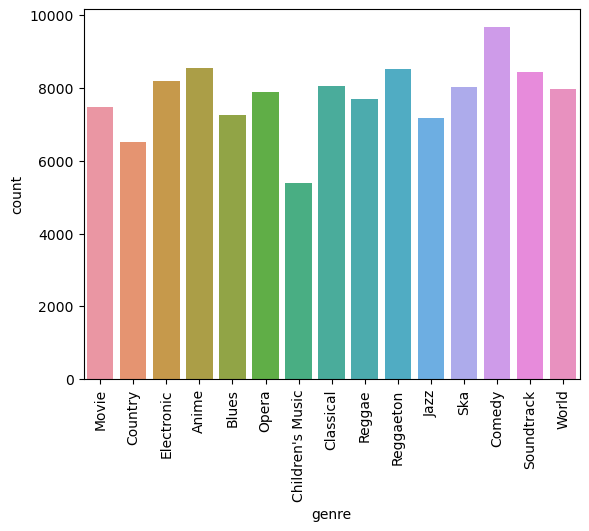

In [4]:
sns.countplot(x=target, data=df)
plt.xticks(rotation=90)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

In [6]:
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [9]:
# Train Base Decision Tree Model
model = DecisionTreeClassifier(criterion='gini', 
                               max_depth=8, 
                               min_samples_split=5, 
                               min_samples_leaf=1, 
                               max_features=30)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.49      0.38      0.43      1711
           1       0.28      0.32      0.30      1451
           2       0.67      0.66      0.67      1081
           3       0.58      0.62      0.60      1609
           4       0.99      0.91      0.95      1935
           5       0.43      0.66      0.52      1305
           6       0.53      0.35      0.42      1637
           7       0.35      0.42      0.38      1437
           8       0.59      0.32      0.42      1496
           9       0.65      0.85      0.74      1578
          10       0.38      0.27      0.31      1538
          11       0.51      0.63      0.56      1705
          12       0.50      0.46      0.48      1603
          13       0.71      0.62      0.66      1689
          14       0.37      0.45      0.41      1592

    accuracy                           0.53     23367
   macro avg       0.53      0.53      0.52     23367
weighted av

In [11]:
from sklearn.metrics import precision_recall_fscore_support

# Weighted Average
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Weighted-Averaged Precision: {precision:.2f}')
print(f'Weighted-Averaged Recall: {recall:.2f}')
print(f'Weighted-Averaged F1 Score: {f1:.2f}')
print('-'*30)
# Macro Averaging
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Macro-Averaged Precision: {precision_macro:.2f}')
print(f'Macro-Averaged Recall: {recall_macro:.2f}')
print(f'Macro-Averaged F1 Score: {f1_macro:.2f}')
print('-'*30)
# Micro Averaging
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(f'Micro-Averaged Precision: {precision_micro:.2f}')
print(f'Micro-Averaged Recall: {recall_micro:.2f}')
print(f'Micro-Averaged F1 Score: {f1_micro:.2f}')

Weighted-Averaged Precision: 0.54
Weighted-Averaged Recall: 0.53
Weighted-Averaged F1 Score: 0.53
------------------------------
Macro-Averaged Precision: 0.53
Macro-Averaged Recall: 0.53
Macro-Averaged F1 Score: 0.52
------------------------------
Micro-Averaged Precision: 0.53
Micro-Averaged Recall: 0.53
Micro-Averaged F1 Score: 0.53


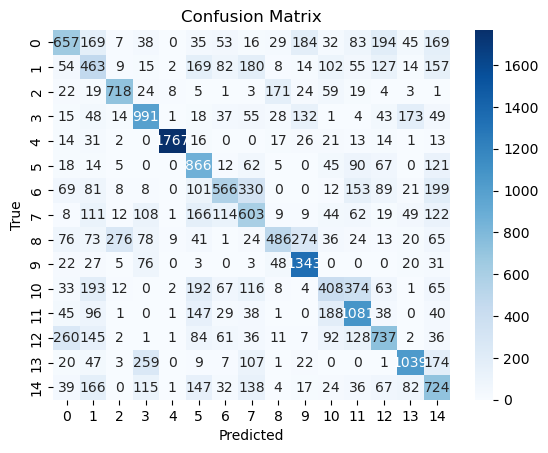

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
y_pred

array([13,  4, 11, ..., 12,  3, 11])

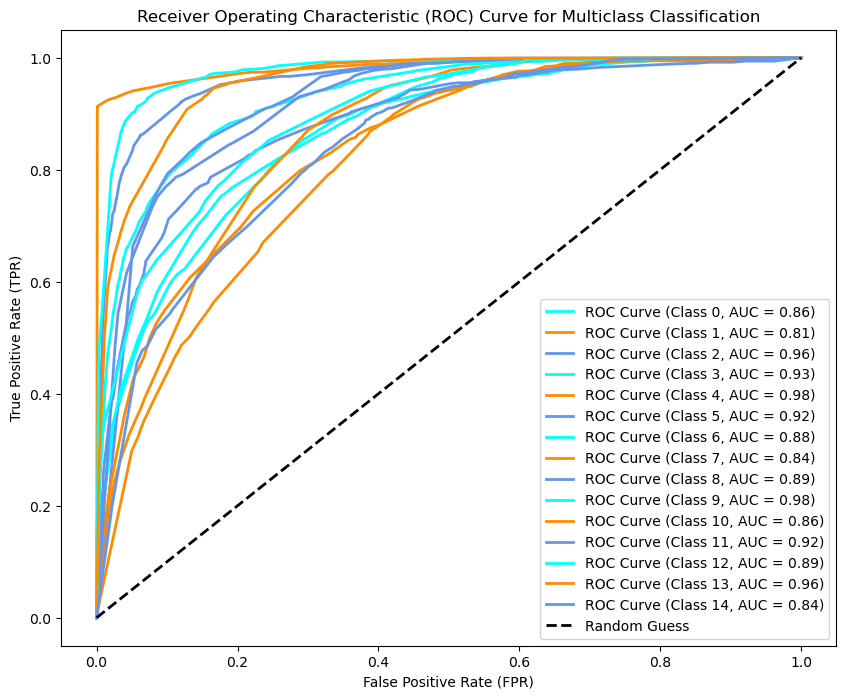

Class 0: ROC-AUC = 0.86
Class 1: ROC-AUC = 0.81
Class 2: ROC-AUC = 0.96
Class 3: ROC-AUC = 0.93
Class 4: ROC-AUC = 0.98
Class 5: ROC-AUC = 0.92
Class 6: ROC-AUC = 0.88
Class 7: ROC-AUC = 0.84
Class 8: ROC-AUC = 0.89
Class 9: ROC-AUC = 0.98
Class 10: ROC-AUC = 0.86
Class 11: ROC-AUC = 0.92
Class 12: ROC-AUC = 0.89
Class 13: ROC-AUC = 0.96
Class 14: ROC-AUC = 0.84


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_pred = model.predict_proba(X_test)
# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=model.classes_)

# Initialize lists to store fpr, tpr, and roc_auc for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(len(model.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = roc_auc_score(y_true_bin[:, i], y_pred[:, i])
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
    
    plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC Curve (Class {i}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend()
plt.show()

# Print ROC-AUC scores for each class
for i, roc_auc in enumerate(roc_auc_list):
    print(f'Class {i}: ROC-AUC = {roc_auc:.2f}')


## Grid Search - Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [12, 15],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [6,8,10],
    'random_state': [42]
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(dt_classifier, 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Hyperparameters: {accuracy:.2f}')


/Users/rahulagnihotri/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rahulagnihotri/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rahulagnihotri/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/rahulagnihotri/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_pa

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
Accuracy with Best Hyperparameters: 0.59


In [18]:
y_pred = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy with Best Hyperparameters: {accuracy:.2f}')

Accuracy with Best Hyperparameters: 0.69


In [9]:
from sklearn.tree import export_text, plot_tree

# Text-based Visualization
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- speechiness_standardized <= 1.96
|   |--- loudness_standardized <= -0.43
|   |   |--- popularity_standardized <= -0.47
|   |   |   |--- popularity_standardized <= -1.81
|   |   |   |   |--- danceability_standardized <= 0.32
|   |   |   |   |   |--- loudness_standardized <= -1.29
|   |   |   |   |   |   |--- popularity_standardized <= -1.95
|   |   |   |   |   |   |   |--- duration_ms_standardized <= -0.01
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- duration_ms_standardized >  -0.01
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- popularity_standardized >  -1.95
|   |   |   |   |   |   |   |--- popularity_standardized <= -1.88
|   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |--- popularity_standardized >  -1.88
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- loudness_standardized >  -1.29
|   |   |   |   |   |   |--- instrumentalness_standardized <= -0

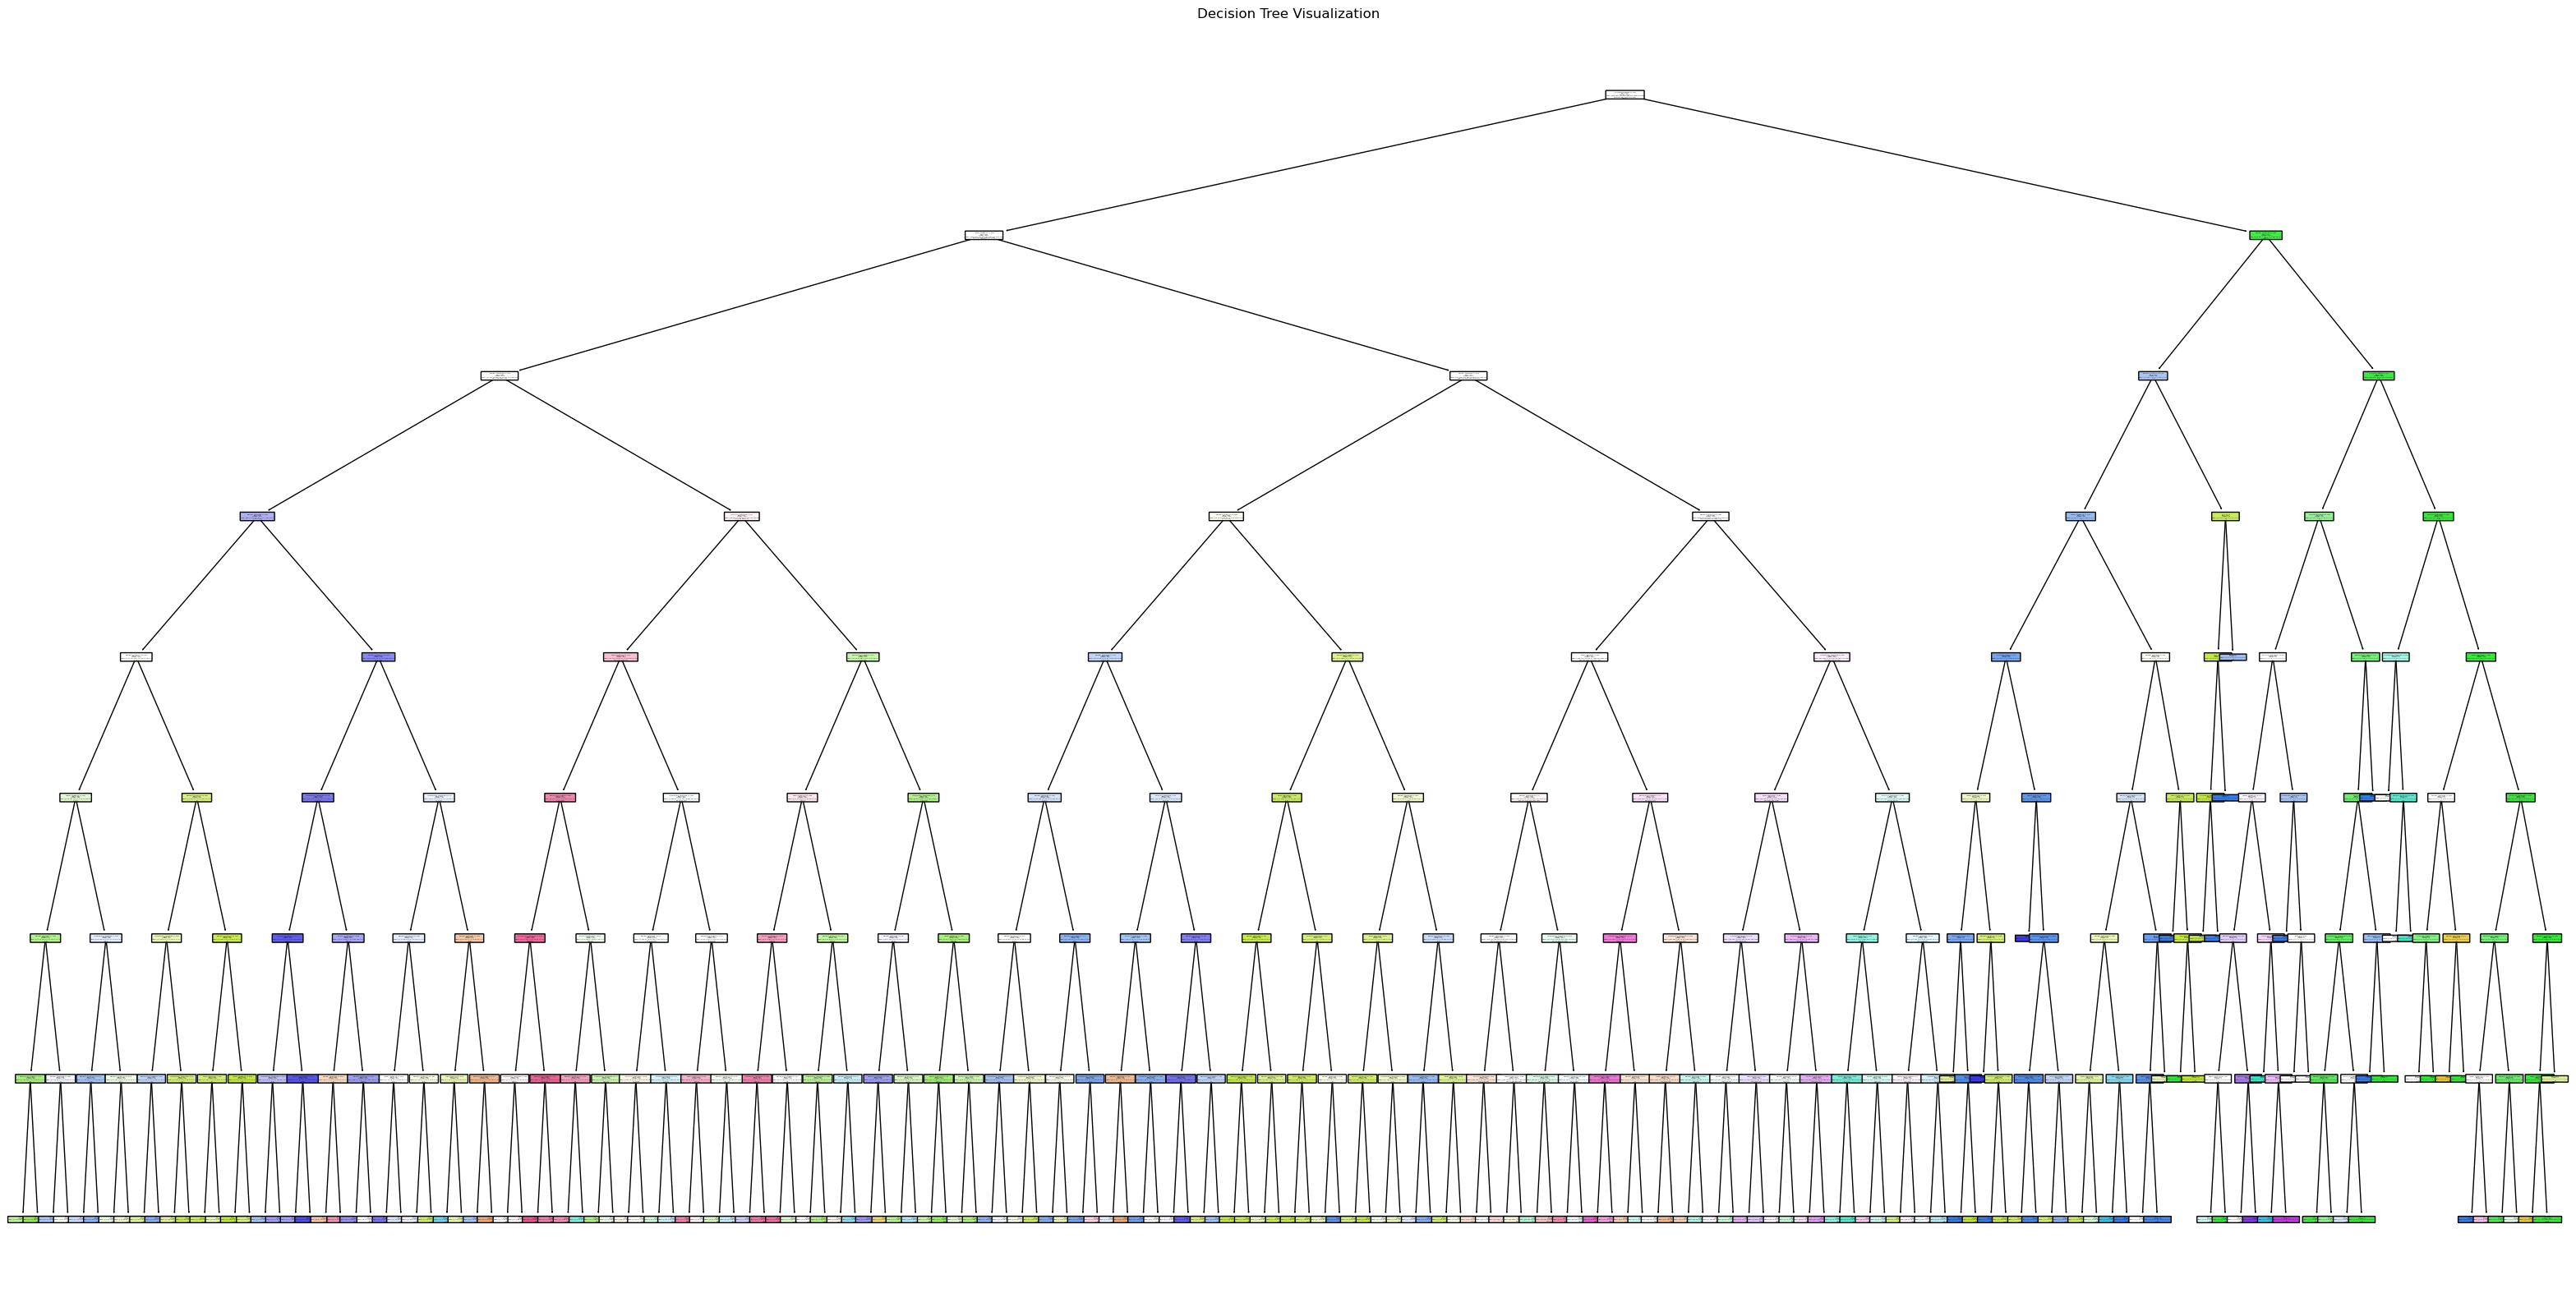

In [10]:
# Plot Decision Tree
plt.figure(figsize=(40, 20))
plot_tree(model, 
          feature_names=list(X.columns), 
          class_names=[str(i) for i in model.classes_], 
          filled=True, 
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [11]:
import joblib

# Save the Model
joblib.dump(model, 'decision_tree_model.joblib')

# Load the Model
loaded_model = joblib.load('decision_tree_model.joblib')


### Chi Square Test

In [35]:
contingency_table = pd.crosstab(np.array(X_train['mode_minor']), y_train)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

from scipy.stats import chi2_contingency
# Perform chi-square test
chi2, p, dof, e= chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

Contingency Table:
col_0    0     1     2     3     4     5     6     7     8     9     10    11  \
row_0                                                                           
0      4326  4141  3755  4356  5361  4588  3525  3066  4553  4886  3522  3487   
1      2519  1663   566  2077  2377   633  3024  2682  1431  1427  2629  3334   

col_0    12    13    14  
row_0                    
0      4798  3777  4880  
1      1615  2980  1489  

Chi-Square Statistic: 5338.493440747241
P-value: 0.0
